In [1]:
import skfda
from skfda.inference.anova import oneway_anova
from skfda.representation import FDataGrid, FDataBasis
from skfda.representation.basis import Fourier

In [2]:
dataset = skfda.datasets.fetch_gait()
fd_hip = dataset['data'].coordinates[0]
fd_knee = dataset['data'].coordinates[1].to_basis(Fourier(n_basis=10))

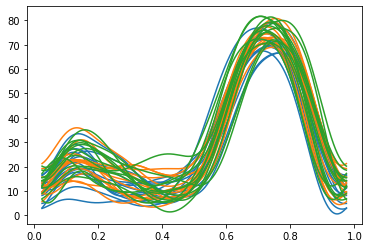

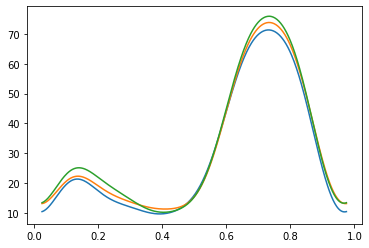

In [3]:
fd_knee1 = fd_knee[0:13]
fd_knee2 = fd_knee[13:26]
fd_knee3 = fd_knee[26:39]
fd_knee.plot(group=[0 if i < 13 else 1 if i < 26 else 39 for i in range(39)])

means = [fd_knee1.mean(), fd_knee2.mean(), fd_knee3.mean()]
fd_means = skfda.concatenate(means)
fig = fd_means.plot()

In [4]:
v_n, p_val, dist = oneway_anova(fd_knee1, fd_knee2, fd_knee3, n_reps=1500,
                                return_dist=True)

print('Statistic: ', v_n)
print('p-value: ', p_val)
print('Distribution: ', dist)

Statistic:  178.58753775850474
p-value:  0.5926666666666667
Distribution:  [257.96753622 187.8348884  314.68084715 ... 250.92546347 212.19797325
 256.24186767]
